In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import time

In [2]:
p1,c1 = 0.05,0.0038
p2,c2 = 0.1,0.015
p3,c3 = 0.15,0.032

In [3]:
P_bnl = lambda n,p:p * (1 - p)**(n-1)
E_bnl = lambda p,n_max=10000:np.sum([P_bnl(n,p) * n for n in range(1,n_max)])
D_bnl = lambda p,n_max=10000:np.sum([P_bnl(n,p) * n**2 for n in range(1,n_max)]) - E_bnl(p) * E_bnl(p)

P_prd = lambda n,c,n_start=1:float(np.prod([1 - n*c for n in range(n_start,n)]) * n * c)
E_prd = lambda c,n_start=1:np.sum([P_prd(n,c) * n for n in range(n_start,int(1/c)+2)])
D_prd = lambda c,n_start=1:np.sum([P_prd(n,c) * n**2 for n in range(n_start,int(1/c)+2)]) - E_prd(c) * E_prd(c)

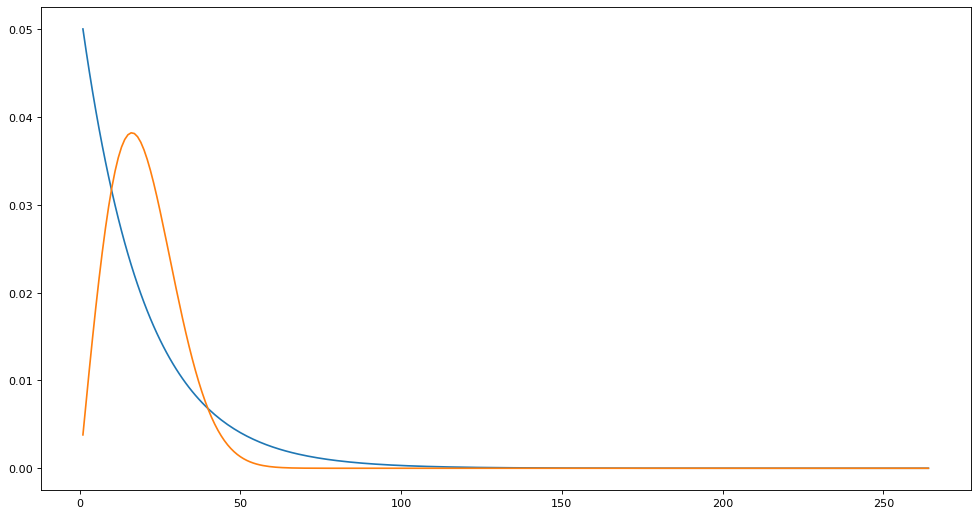

In [4]:
# Xn表示事件{普攻n次最后1次暴击}，绘制Xn的概率分布函数图像
X_plot = [i+1 for i in range(int(1/c1)+1)]

fig = plt.figure(num=1, figsize=(15, 8),dpi=80)
plt.plot(X_plot,[P_bnl(n,p1) for n in X_plot]) # blue
plt.plot(X_plot,[P_prd(n,c1) for n in X_plot]) # orange
plt.show()

In [5]:
# 用于比较二项分布和PDR算法下的伪随机分布期望和方差的函数
def Test(c,p,n=10000):
    print(E_prd(c))
    print(E_bnl(p,n))
    print(D_prd(c))
    print(D_bnl(p,n))
    return "-----------"

In [6]:
# 比较prd和bnl的期望和方差
print(Test(c1,p1,int(1/c1)+1))
print(Test(c2,p2,int(1/c2)+1))
print(Test(c3,p3,int(1/c3)+1))

20.004433468536533
19.999608172758663
106.13399760804288
379.8885867622601
-----------
9.912289428791116
9.927419623739446
25.167562184418117
84.39794095862584
-----------
6.690668087531523
6.422355180306821
11.04429245495595
28.330346289013207
-----------


可以看出期望相同的情况下（即平均暴击间隔相等），PDR算法下的伪随机分布方差更小，这意味着极端事件出现的概率更小

In [7]:
# 二分法求C值，即PDR算法下单次普攻暴击的概率
def Prd(p_bnl,alpha=0.1,Z_max=10000,E2=0): 
    p_inf = 0
    p_sup = p_bnl
    c_prd = p_bnl
    E1 = E_prd(c_prd)
    E2 = E_bnl(p_bnl) if E2==0 else E2
    while abs(E1 - E2) >= alpha and Z_max:    
        if E1 < E2:
            p_sup = c_prd
            c_prd = (p_inf + p_sup) / 2
        else:
            p_inf = c_prd
            c_prd = (p_inf + p_sup) / 2
        E1 = E_prd(c_prd)
        Z_max -= 1      
    return c_prd

In [8]:
c_prd_1 = Prd(p1,0.3,100)
c_prd_2 = Prd(p2,0.3,100)
c_prd_3 = Prd(p3,0.3,100)
print(Prd(p1,0.3,100))
print(Prd(p2,0.3,100))
print(Prd(p3,0.3,100))

0.00390625
0.015625
0.032812499999999994


In [9]:
print(Test(c_prd_1,p1))
print(Test(c_prd_2,p2))
print(Test(c_prd_3,p3))

19.726105903184365
19.99999999999996
103.15463999317075
379.9999999999996
-----------
9.705781250786004
10.000000000000007
24.09202906110488
89.99999999999997
-----------
6.603593134281209
6.666666666666663
10.741345534975146
37.77777777777777
-----------


DOTA2 Wiki给出的C值对应图

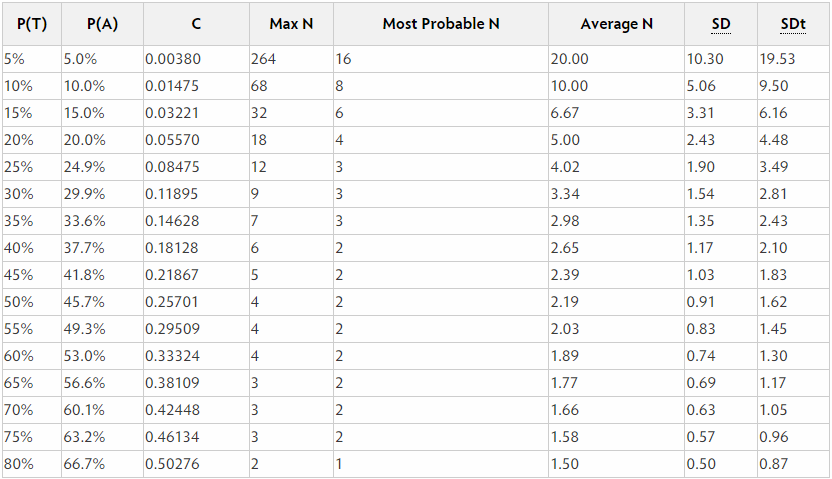